In [1]:
import numpy as np
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random, seed
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
sns.set_theme(style='whitegrid')

Franke function

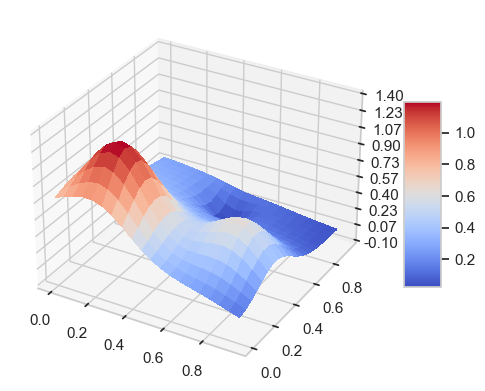

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Implementing the design matrix

In [6]:
def Vandermonde_design_matrix(x: np.ndarray, p: int) -> np.ndarray:
    """Sets up the design matrix given an input array x,
    and the degree of the polynomial fit"""
    Vandermonde = [x**i for i in range(p+1)]
    return np.hstack(Vandermonde)

First function for experimentation

In [7]:
np.random.seed(3)
n = 100
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

In [38]:
MSE_OLS_train = np.zeros(6)
MSE_OLS_test = np.zeros(6)
R2_OLS_train = np.zeros(6)
R2_OLS_test = np.zeros(6)

beta_values = []

for i in range(6):
    # Constructing the design matrix
    X = Vandermonde_design_matrix(x, i)

    # Splitting the data into train and test and scaling the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

    ## scaling the data
    X_train_mean = np.mean(X_train, axis=0)

    x_train_scaled = X_train - X_train_mean
    x_test_scaled = X_test - X_train_mean

    y_mean = np.mean(y_train)
    y_train_scaled = y_train - y_mean


    # fitting the data with OLS
    OLS_beta = np.linalg.pinv(x_train_scaled.T @ x_train_scaled) @ x_train_scaled.T @ y_train_scaled

    intercept = np.mean(y_mean - X_train_mean @ OLS_beta)

    y_tilde_OLS = x_train_scaled @ OLS_beta + y_mean
    y_predict_OLS = x_test_scaled @ OLS_beta + y_mean

    MSE_OLS_train[i] = mean_squared_error(y_tilde_OLS, y_train)
    MSE_OLS_test[i] = mean_squared_error(y_predict_OLS, y_test)
    R2_OLS_train[i] = r2_score(y_tilde_OLS, y_train)
    R2_OLS_test[i] = r2_score(y_predict_OLS, y_test)

    beta_values.append(list(OLS_beta))

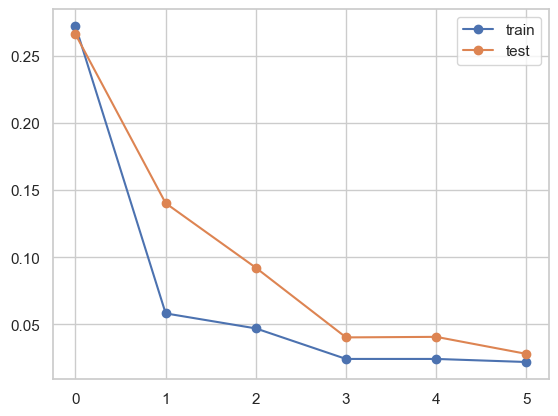

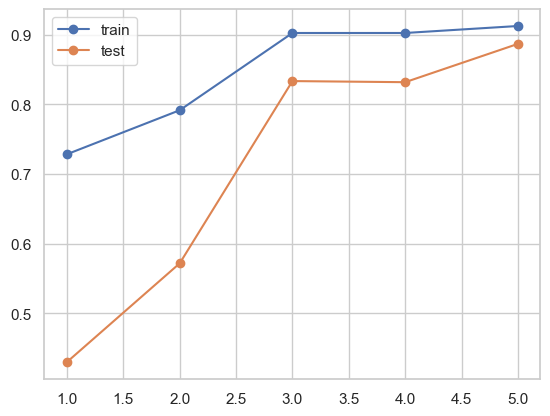

In [34]:
N = list(range(6))

plt.plot(N,MSE_OLS_train, 'o-', label='train')
plt.plot(N,MSE_OLS_test, 'o-', label='test')
plt.legend()
plt.show()

plt.plot(N[1:],R2_OLS_train[1:], 'o-', label='train')
plt.plot(N[1:],R2_OLS_test[1:], 'o-', label='test')
plt.legend()
plt.show()

In [42]:
beta = np.zeros((6,6))

for i in range(6):
    for j in range(len(beta_values[i])):
        beta[i,j] = beta_values[i][j]

C:\Users\maria\AppData\Local\Temp\ipykernel_26320\541528433.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta[i,j] = beta_values[i][j]


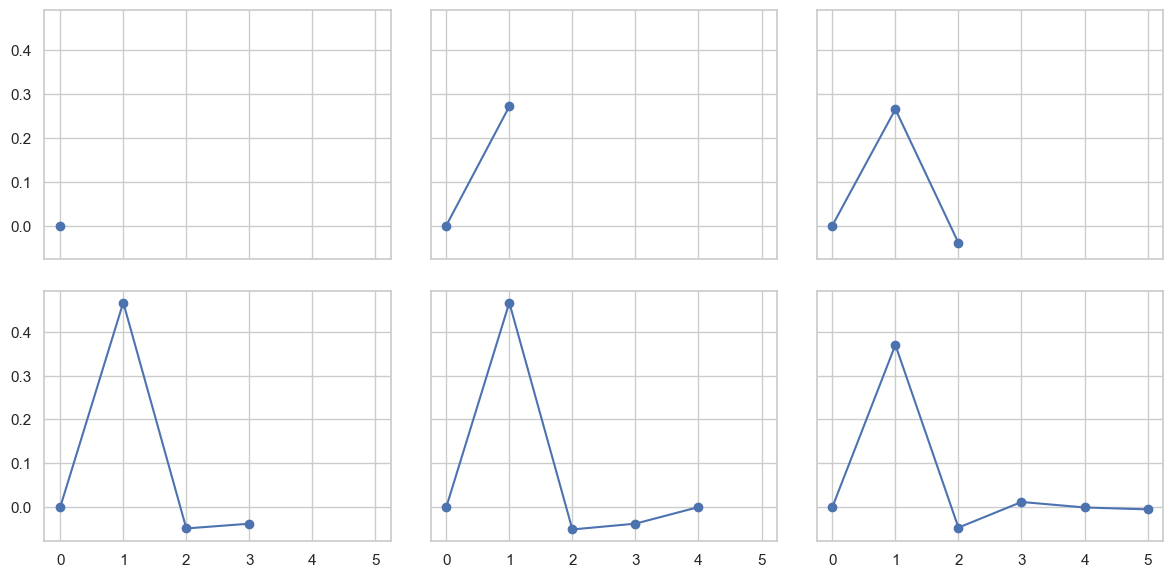

In [72]:
fig, axs = plt.subplots(2,3, figsize=(12, 6), sharex=True, sharey=True)
fig.tight_layout()

N = list(range(6))

for row in range(2):
    for col in range(3):
        axs[row, col].plot(N[:3*row + col + 1], beta[3*row + col][:3*row + col + 1], 'o-')
        
plt.show()

### b)

In [ ]:
MSE_Ridge_train = np.zeros(6)
MSE_Rigde_test = np.zeros(6)
R2_Ridge_train = np.zeros(6)
R2_Ridge_test = np.zeros(6)

beta_values = []

for i in range(6):
    # Constructing the design matrix
    X = Vandermonde_design_matrix(x, i)

    # Splitting the data into train and test and scaling the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

    ## scaling the data
    X_train_mean = np.mean(X_train, axis=0)

    x_train_scaled = X_train - X_train_mean
    x_test_scaled = X_test - X_train_mean

    y_mean = np.mean(y_train)
    y_train_scaled = y_train - y_mean


    # fitting the data with OLS
    OLS_beta = np.linalg.pinv(x_train_scaled.T @ x_train_scaled) @ x_train_scaled.T @ y_train_scaled

    intercept = np.mean(y_mean - X_train_mean @ OLS_beta)

    y_tilde_OLS = x_train_scaled @ OLS_beta + y_mean
    y_predict_OLS = x_test_scaled @ OLS_beta + y_mean

    MSE_OLS_train[i] = mean_squared_error(y_tilde_OLS, y_train)
    MSE_OLS_test[i] = mean_squared_error(y_predict_OLS, y_test)
    R2_OLS_train[i] = r2_score(y_tilde_OLS, y_train)
    R2_OLS_test[i] = r2_score(y_predict_OLS, y_test)

    beta_values.append(list(OLS_beta))